In [1]:
import pandas 
Data = pandas.read_csv('Customer-Churn-Records.csv')

In [2]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
Data.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206


Note: 
+ Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
+ NumOfProducts—refers to the number of products that a customer has purchased through the bank.

Data Cleaning 

In [4]:
Data = Data.drop('RowNumber',axis=1)

In [5]:
Data.isnull().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Luckily, there are no null values in our data 

Clients in our data comes from three countries: France, Germany, Spain

In [6]:
Data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

It seem like the problem for us to having the huge numbers of France people, which will cause imbalance dataset

Text(0.5, 1.0, 'Frequency of Geography')

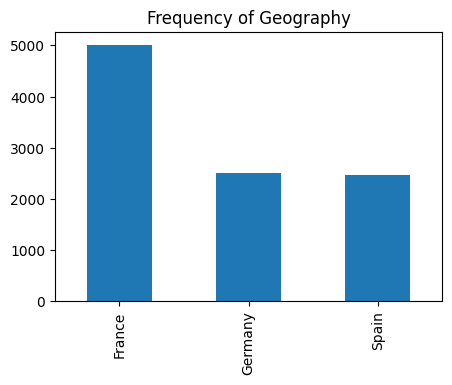

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
Data['Geography'].value_counts().plot.bar()
plt.title('Frequency of Geography')

In [8]:
rows_to_delete = Data[Data['Geography'] == 'France'].index[:2100]
Data = Data.drop(rows_to_delete)

Next, we will check the outliers in our data 

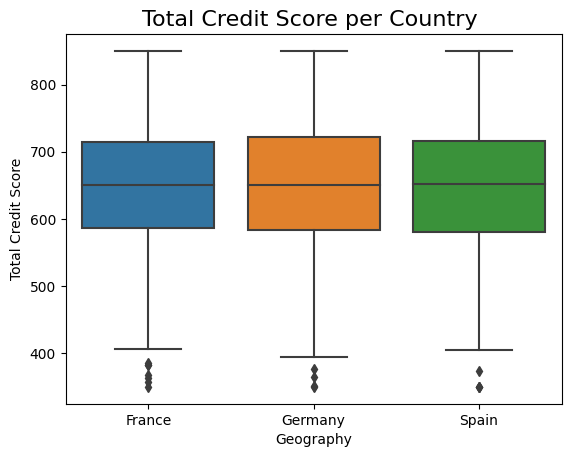

In [9]:
import matplotlib.pyplot as plt
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'CreditScore', x = 'Geography',
            data = Data)
plt.title('Total Credit Score per Country ',
         fontsize = 16)
plt.ylabel('Total Credit Score')
plt.xlabel('Geography')
plt.xticks(range(3), ['France', 'Germany', 'Spain']) # avoids tick labels overlap
plt.show()

We will drop any clients from three countries who have credit score under 400

In [10]:
Credit_Score_Outliers = Data[Data['CreditScore'] < 400]
Data = Data.drop(Credit_Score_Outliers.index)

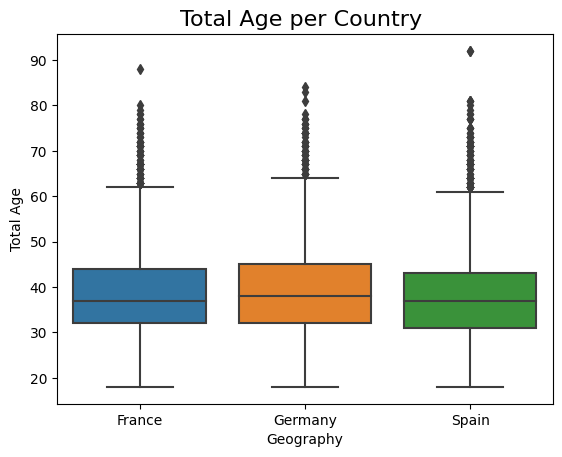

In [11]:
import matplotlib.pyplot as plt
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'Age', x = 'Geography',
            data = Data)
plt.title('Total Age per Country ',
         fontsize = 16)
plt.ylabel('Total Age')
plt.xlabel('Geography')
plt.xticks(range(3), ['France', 'Germany', 'Spain']) # avoids tick labels overlap
plt.show()

For clients who are over 60 in age, we will convert their age to about 60 

In [12]:
Data['Age'] = Data['Age'].apply(lambda x: 60 if x > 60 else x)

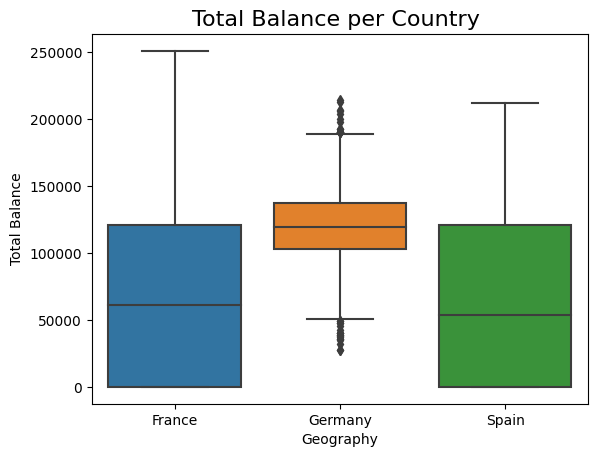

In [13]:
import matplotlib.pyplot as plt
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'Balance', x = 'Geography',
            data = Data)
plt.title('Total Balance per Country ',
         fontsize = 16)
plt.ylabel('Total Balance')
plt.xlabel('Geography')
plt.xticks(range(3), ['France', 'Germany', 'Spain']) # avoids tick labels overlap
plt.show()

It can be witnessed that Germany has the high proportions of balance in comparision with two others countries

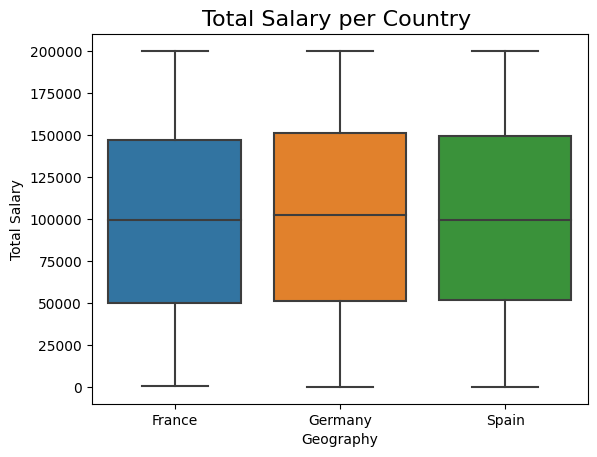

In [14]:
import matplotlib.pyplot as plt
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'EstimatedSalary', x = 'Geography',
            data = Data)
plt.title('Total Salary per Country ',
         fontsize = 16)
plt.ylabel('Total Salary')
plt.xlabel('Geography')
plt.xticks(range(3), ['France', 'Germany', 'Spain']) # avoids tick labels overlap
plt.show()

Three countries have the nearly same range of salary 

Drop column with unique value 

In [15]:
orig_columns = Data.columns
drop_columns = []
for col in orig_columns:
    col_series = Data[col].dropna().unique()
    if len(col_series) == 1: ##Use the len() function to return the number of values in that set##
        drop_columns.append(col)
Data = Data.drop(drop_columns, axis=1)
print(drop_columns)

[]


Data visualization

In [16]:
import pandas as pd
by_gender = Data.groupby('Gender').agg({"CreditScore" :['mean']})
by_gender.columns = ['Avg Credit Score']
by_gender =pd.DataFrame(by_gender)
by_gender.reset_index(inplace=True)
by_gender

,Gender,Avg Credit Score
0,Female,651.622278
1,Male,650.747036


Text(0.5, 0, 'Gender')

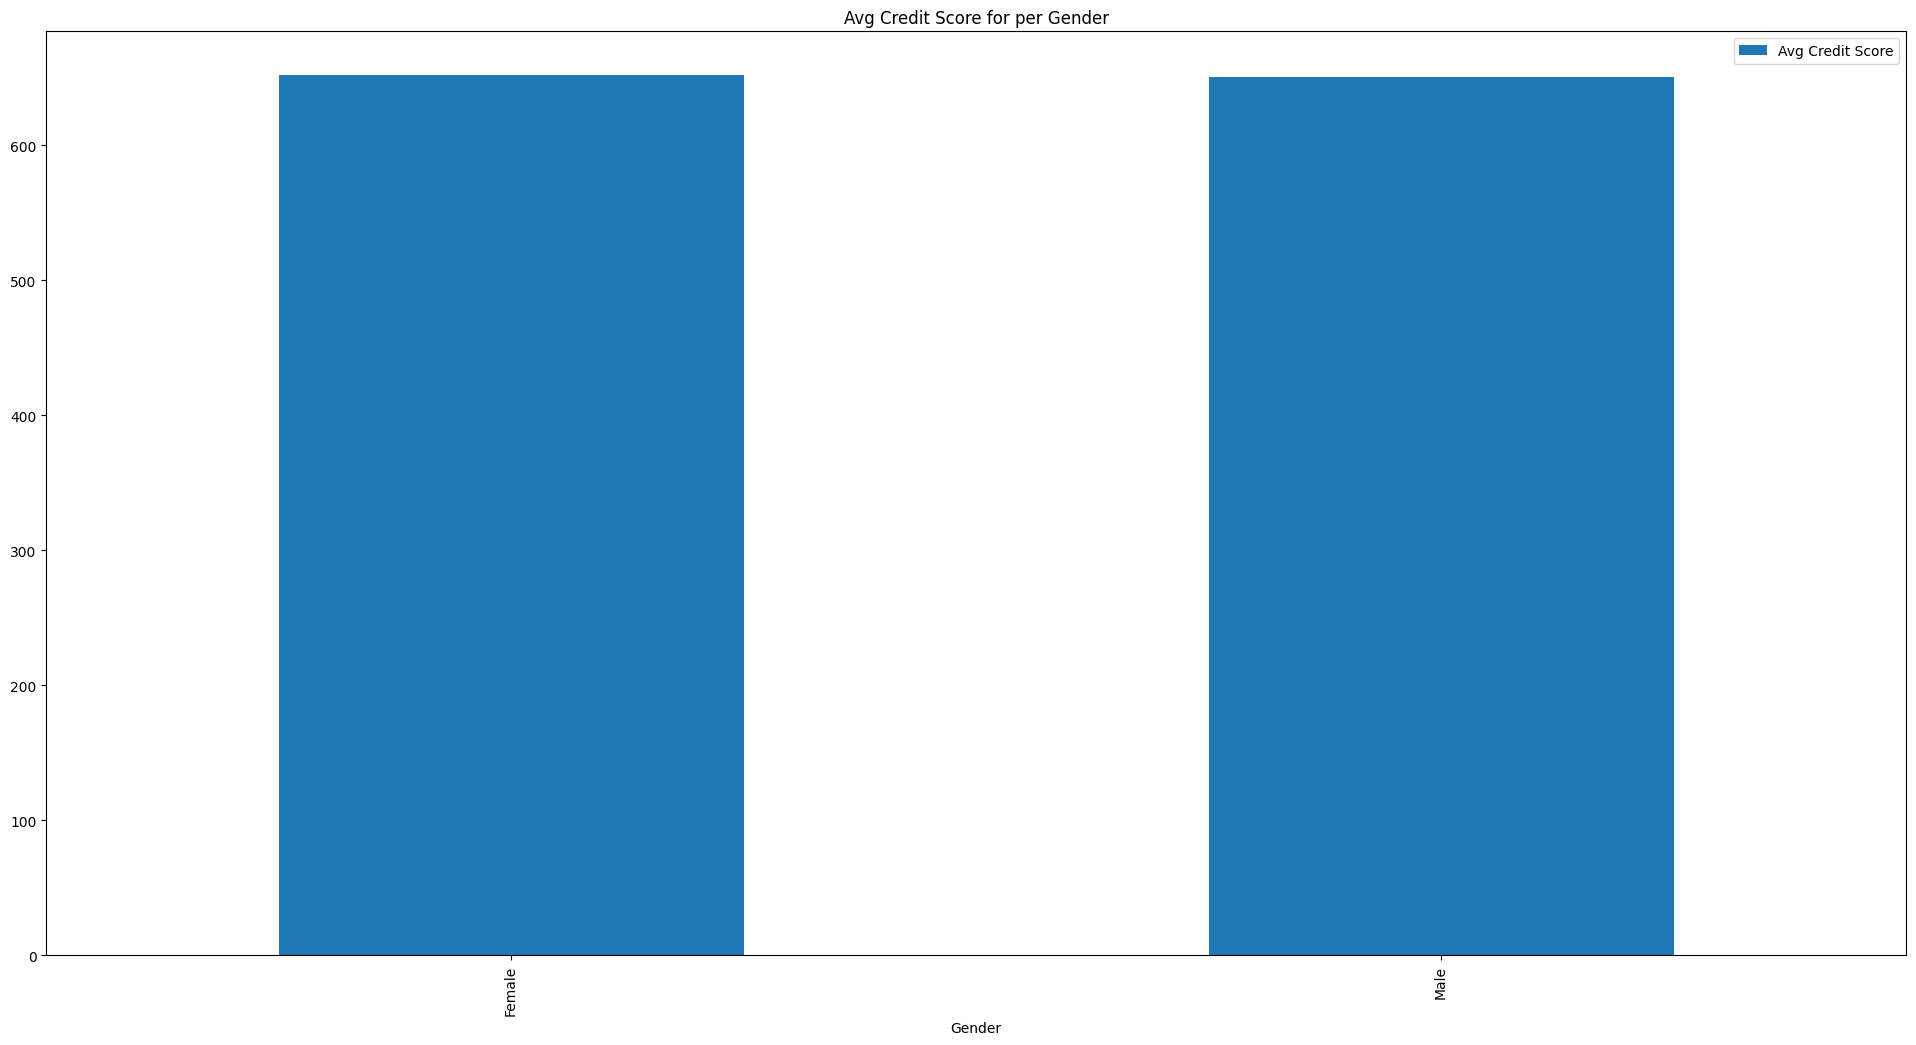

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ax1 = by_gender.plot(x='Gender',y='Avg Credit Score',kind='bar',figsize=(24,12))
ax1.set_title('Avg Credit Score for per Gender')
ax1.set_xlabel('Gender')

Female and Male have nearly the same avg of credit score 

In [18]:
Data.head(7)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,0,3,GOLD,249
14,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,0,2,GOLD,318
15,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,0,5,GOLD,308
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163


In [19]:
Germany = Data[Data['Geography'] == 'Germany']
Spain = Data[Data['Geography'] == 'Spain']
France = Data[Data['Geography'] == 'France']

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

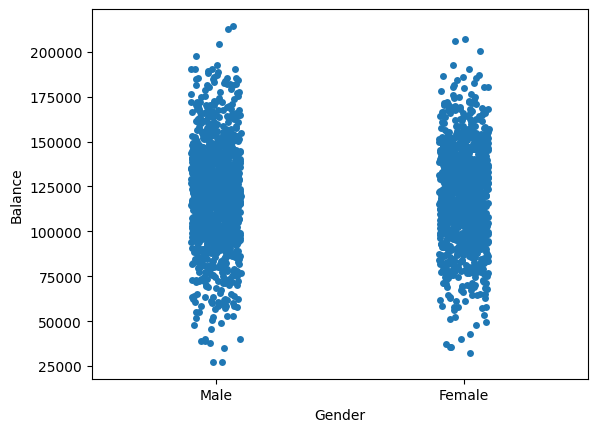

In [20]:
sns.stripplot(x='Gender',y='Balance',data = Germany ,jitter= True )

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

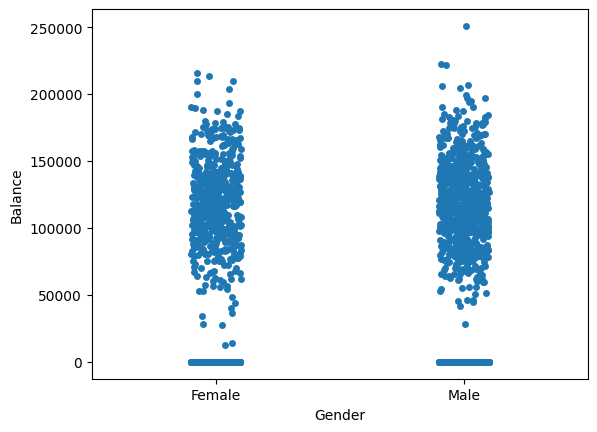

In [21]:
sns.stripplot(x='Gender',y='Balance',data = Spain ,jitter= True )

The equality in balance in client's account from Germany and Spain

In [22]:
# Frequency tables with absolute and relative frequencies
relative_frequencies = Data['Card Type'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = { 'Percentage': relative_frequencies}
            )

,Percentage
DIAMOND,25.358366
PLATINUM,25.193454
GOLD,24.990486
SILVER,24.457694


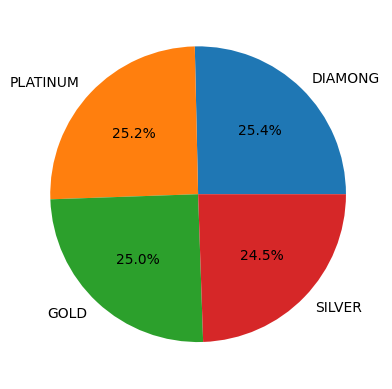

In [23]:
my_label = ['DIAMONG', 'PLATINUM','GOLD','SILVER']
plt.pie(relative_frequencies,labels = my_label,autopct="%.1f%%")
plt.show()

CLUSTERING

In [24]:
Data.head(6)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,0,3,GOLD,249
14,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,0,2,GOLD,318
15,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,0,5,GOLD,308


blue
red
green


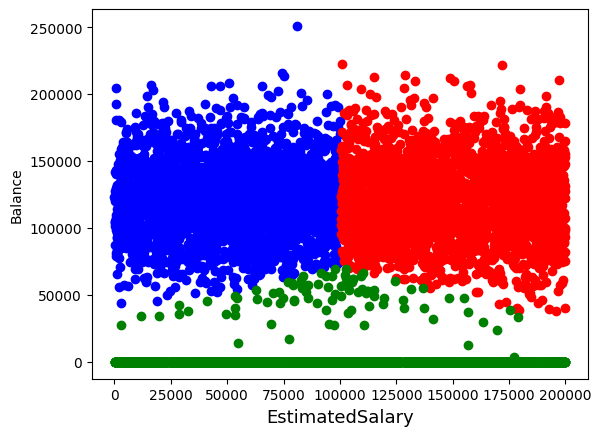

In [56]:
from sklearn.cluster import KMeans

def visualize_clusters(df,num_clusters):
    colors =['red', 'green', 'blue']

    for n in range(num_clusters):
        cluster_df = df[df['cluster'] == n]
        plt.scatter(cluster_df['EstimatedSalary'],cluster_df['Balance'],c=colors[n-1])
        plt.xlabel('EstimatedSalary',fontsize =13)
        plt.ylabel('Balance')
        print(colors[n-1])
        
plt.show()


KMeans = KMeans(n_clusters = 3)
KMeans.fit(Data[['EstimatedSalary','Balance']])
Data['cluster'] = KMeans.labels_
visualize_clusters(Data,3)

Banks can concetrate for clients in cluster group 1 because they have high salary and balance in their account 

In [58]:
Cluster_group_1 = Data[Data['cluster'] == 1]

In [59]:
Cluster_group_1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,cluster
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,1
26,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,0,5,DIAMOND,236,1
36,15788448,Watson,490,Spain,Male,31,3,145260.23,1,0,1,114066.77,0,0,4,SILVER,471,1
39,15585768,Cameron,582,Germany,Male,41,6,70349.48,2,0,1,178074.04,0,0,5,GOLD,419,1


In [60]:
# Frequency tables with absolute and relative frequencies
relative_frequencies = Cluster_group_1['Geography'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = { 'Percentage': relative_frequencies}
            )

,Percentage
Germany,48.084291
France,27.701149
Spain,24.214559


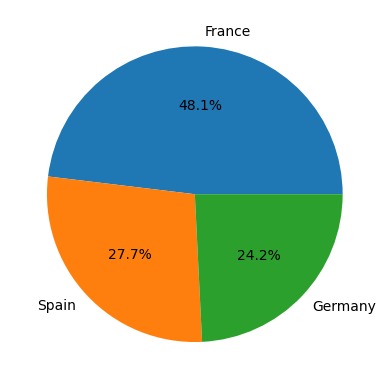

In [61]:
my_label = ["France","Spain","Germany"]
plt.pie(relative_frequencies,labels = my_label,autopct="%.1f%%")
plt.show()

Surprisingly, France's clients account for highest proportions of cluster group 1

In [62]:
Count_Exit = Cluster_group_1['Exited'].value_counts(normalize=100) *100
Count_Exit

0    75.019157
1    24.980843
Name: Exited, dtype: float64

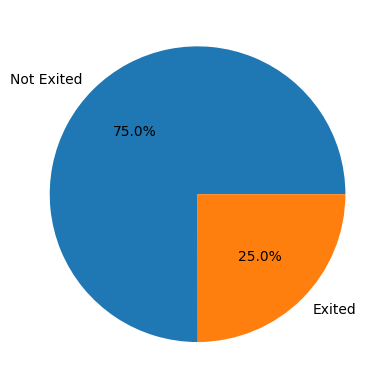

In [63]:
my_label = ["Not Exited","Exited"]
plt.pie(Count_Exit,labels = my_label,autopct="%.1f%%")
plt.show()

The higher the balance client have, the low percenatage of chance that client will exit bank 

Predict whether the client will exit bank or not 

In [831]:
Data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,cluster
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,0
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,0,3,GOLD,249,2
14,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,0,2,GOLD,318,2


In [832]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

list =["Geography","Gender","Card Type"]

for col in list:
    Data = create_dummies(Data,col)
    Data = Data.drop(col,axis=1)

In [833]:
import numpy as np
# Randomize order of rows in data frame.
shuffled_index = np.random.permutation(Data.index)
rand_df = Data.reindex(shuffled_index)
# Divide number of rows in half and round.
last_train_row = int(len(rand_df) / 2)
    
# Select the first half and set as training set.
# Select the second half and set as test set.
train_df = rand_df.iloc[0:last_train_row]
test_df = rand_df.iloc[last_train_row:]

In [834]:
features = train_df.columns.drop(['CustomerId','Surname','Exited'])

In [835]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [836]:
from sklearn.model_selection import cross_val_score

all_X = train_df[features]
all_y = train_df['Exited']

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(accuracy)

0.8028464948917303


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [837]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Exited"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(solver='lbfgs',max_iter=50000),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train_df,features)

LogisticRegression
------------------


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: T

Best Score: 0.998477799910043
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.793706868855619
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.998477799910043
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4}



Logistic Regression and Randome Forest may be the best model for our exit prediction for clients 